In [523]:
pip install squarify

In [524]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
import squarify
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [525]:
df = pd.read_csv('/content/AmazonSalesData.csv', encoding = 'latin-1')

In [526]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [527]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [528]:
df.isnull()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [529]:
df.isnull().sum()

,0
Region,0
Country,0
Item Type,0
Sales Channel,0
Order Priority,0
Order Date,0
Order ID,0
Ship Date,0
Units Sold,0
Unit Price,0


In [530]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [531]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [532]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


# CONVERTING DATE COLUMNS

In [533]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [534]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memor

In [535]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50


# ADD NEW COLUMNS


In [536]:
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Day of  Week'] = df['Order Date'].dt.dayofweek

In [537]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Day of Week
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010,4
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012,2
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014,4
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014,4
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013,4


In [538]:
df = df.rename(columns={'Units Sold' :'Sales', 'Item Type': 'Category', 'Order Priority':'Sub Category'})


In [539]:
df.head()

,Region,Country,Category,Sales Channel,Sub Category,Order Date,Order ID,Ship Date,Sales,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Day of Week
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010,4
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012,2
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014,4
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014,4
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013,4


# EXPLORATORY DATA ANALYSIS

# MONTHLY SALES ANALYSIS

In [540]:
sales_by_month = df.groupby('Order Month')['Sales'].sum().reset_index()

In [541]:
sales_by_month

,Order Month,Sales
0,1,35742
1,2,71079
2,3,14497
3,4,44680
4,5,63651
5,6,34893
6,7,76201
7,8,17251
8,9,30101
9,10,55472


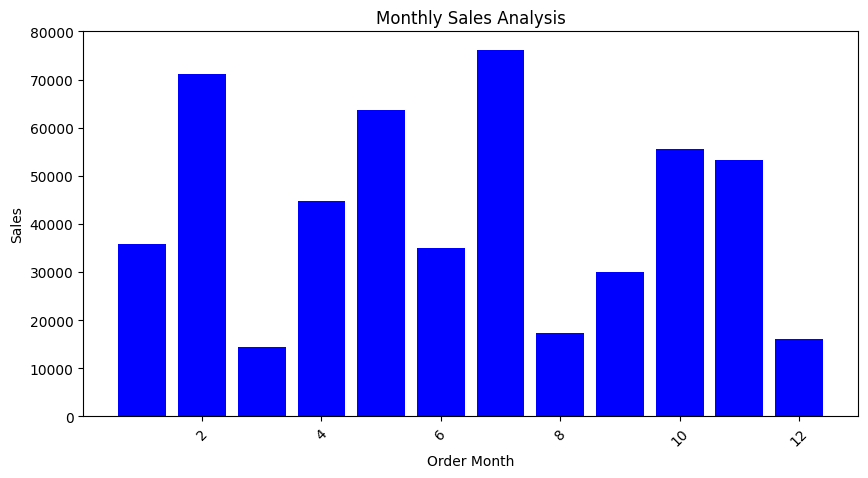

In [542]:
plt.figure(figsize=(10, 5))
plt.bar(sales_by_month['Order Month'], sales_by_month['Sales'], color='blue')
plt.xlabel('Order Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Analysis')
plt.xticks(rotation=45)
plt.show()

# YEARLY SALES ANALYSIS

In [543]:
sales_by_yearly = df.groupby('Order Year')['Sales'].sum().reset_index()

In [544]:
sales_by_yearly

,Order Year,Sales
0,2010,61571
1,2011,54768
2,2012,97967
3,2013,64663
4,2014,92040
5,2015,49480
6,2016,43156
7,2017,49226


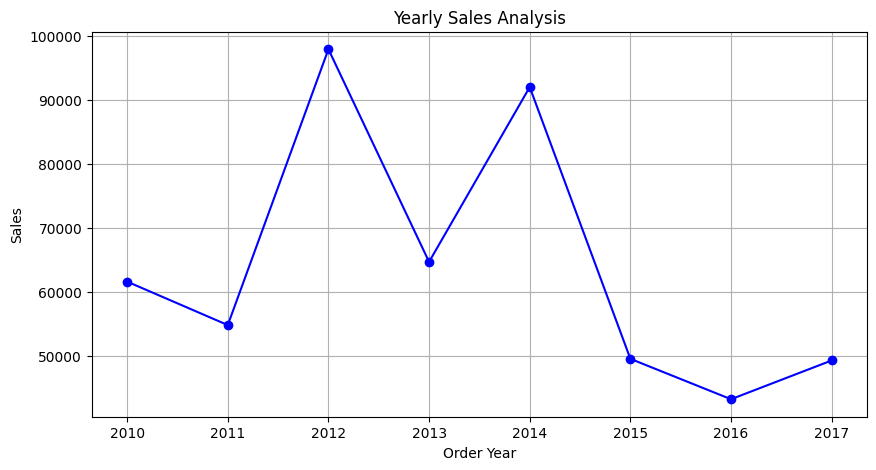

In [545]:
plt.figure(figsize=(10, 5))
plt.plot(sales_by_yearly['Order Year'], sales_by_yearly['Sales'], marker='o', linestyle='-', color='b')
plt.title('Yearly Sales Analysis')
plt.xlabel('Order Year')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# WEAKLY SALES ANALYSIS

In [546]:
sales_by_week = df.groupby('Order Day of  Week')['Sales'].sum().reset_index()

In [547]:
sales_by_week

,Order Day of Week,Sales
0,0,66754
1,1,96931
2,2,51960
3,3,34908
4,4,104807
5,5,95283
6,6,62228


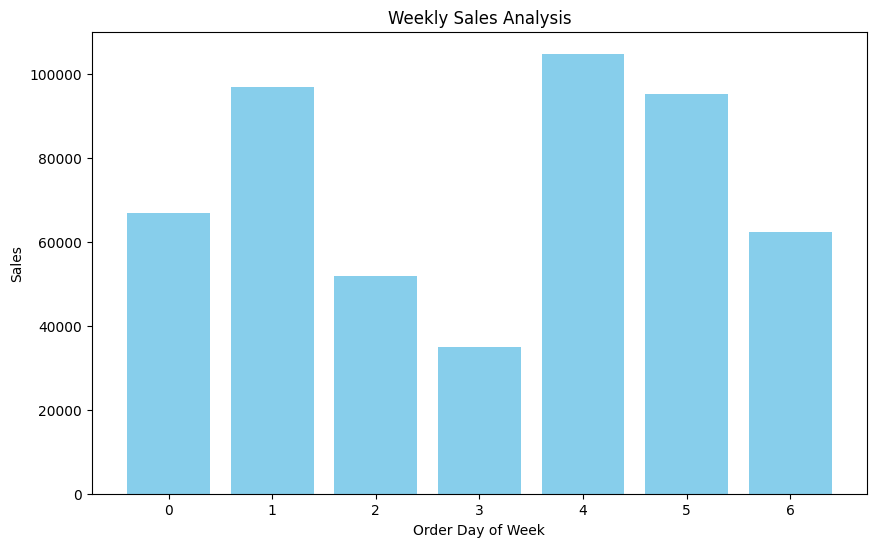

In [548]:
plt.figure(figsize=(10, 6))
plt.bar(sales_by_week['Order Day of  Week'], sales_by_week['Sales'], color='skyblue')
plt.xlabel('Order Day of Week')
plt.ylabel('Sales')
plt.title('Weekly Sales Analysis')
plt.show()

# SALES BY CATEGORY

In [549]:
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()

In [550]:
sales_by_category

,Category,Sales
0,Baby Food,40545
1,Beverages,56708
2,Cereal,25877
3,Clothes,71260
4,Cosmetics,83718
5,Fruits,49998
6,Household,44727
7,Meat,10675
8,Office Supplies,46967
9,Personal Care,48708


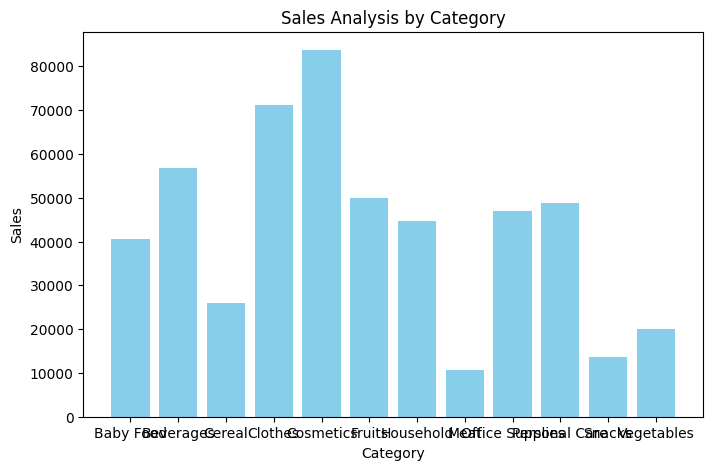

In [551]:
plt.figure(figsize=(8, 5))
plt.bar(sales_by_category['Category'], sales_by_category['Sales'], color='skyblue')
plt.title('Sales Analysis by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

In [552]:
sales_by_sub_category = df.groupby('Sub Category')['Sales'].sum().reset_index()

In [553]:
sales_by_sub_category

,Sub Category,Sales
0,C,116951
1,H,154212
2,L,146876
3,M,94832


In [554]:
labels = sales_by_sub_category['Sub Category']
sizes = sales_by_sub_category['Sales']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

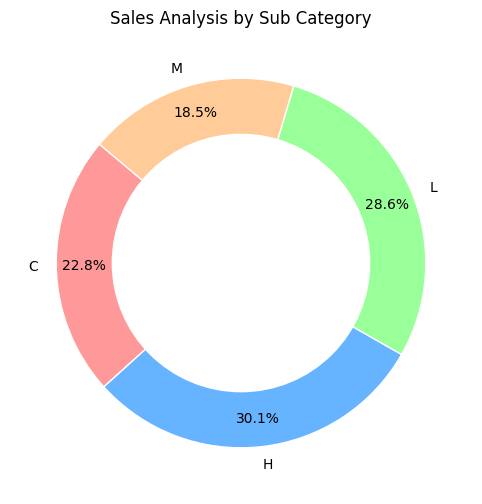

In [555]:
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'white'}, pctdistance=0.85)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Sales Analysis by Sub Category')
plt.show()


# MONTHLY PROFIT ANALYSIS

In [556]:
profit_by_month = df.groupby('Order Month')['Total Profit'].sum().reset_index()

In [557]:
profit_by_month

,Order Month,Total Profit
0,1,2816857.02
1,2,7072050.51
2,3,928351.06
3,4,4760208.35
4,5,4582692.30
5,6,2185379.43
6,7,5578463.06
7,8,579276.67
8,9,2344166.03
9,10,4506923.25


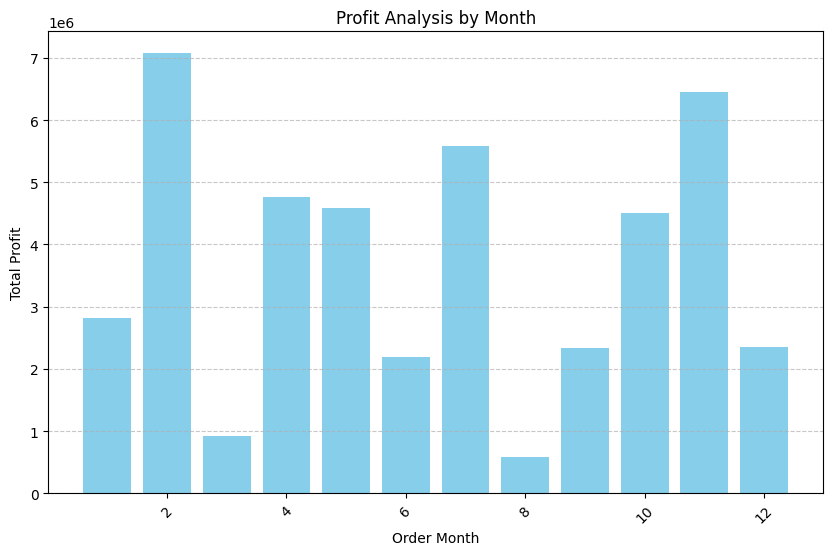

In [558]:
plt.figure(figsize=(10, 6))
plt.bar(profit_by_month['Order Month'], profit_by_month['Total Profit'], color='skyblue')
plt.xlabel('Order Month')
plt.ylabel('Total Profit')
plt.title('Profit Analysis by Month')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [559]:
profit_by_year = df.groupby('Order Year')['Total Profit'].sum().reset_index()

In [560]:
profit_by_year

,Order Year,Total Profit
0,2010,6629567.43
1,2011,2741008.23
2,2012,9213010.12
3,2013,6715420.04
4,2014,5879461.68
5,2015,3996539.44
6,2016,4903838.01
7,2017,4089353.45


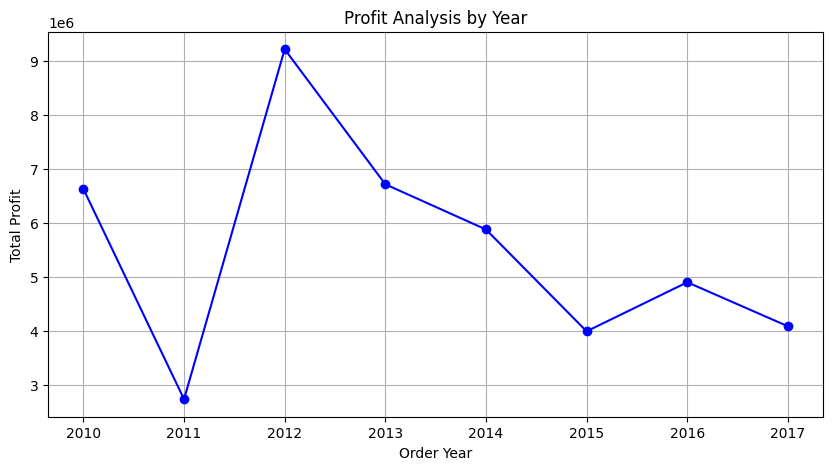

In [561]:
plt.figure(figsize=(10, 5))
plt.plot(profit_by_year['Order Year'], profit_by_year['Total Profit'], marker='o', linestyle='-', color='b')
plt.title('Profit Analysis by Year')
plt.xlabel('Order Year')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

In [562]:
profit_by_week = df.groupby('Order Day of  Week')['Total Profit'].sum().reset_index()

In [563]:
profit_by_week

,Order Day of Week,Total Profit
0,0,6014233.86
1,1,6074962.14
2,2,4634254.88
3,3,3124426.08
4,4,9813425.86
5,5,10596780.14
6,6,3910115.44


In [564]:
profit_by_week = {
    'Order Day of Week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'Total Profit': [200, 300, 250, 400, 350, 500, 450]
}


In [565]:
x_values = profit_by_week['Order Day of Week']
y_values = profit_by_week['Total Profit']


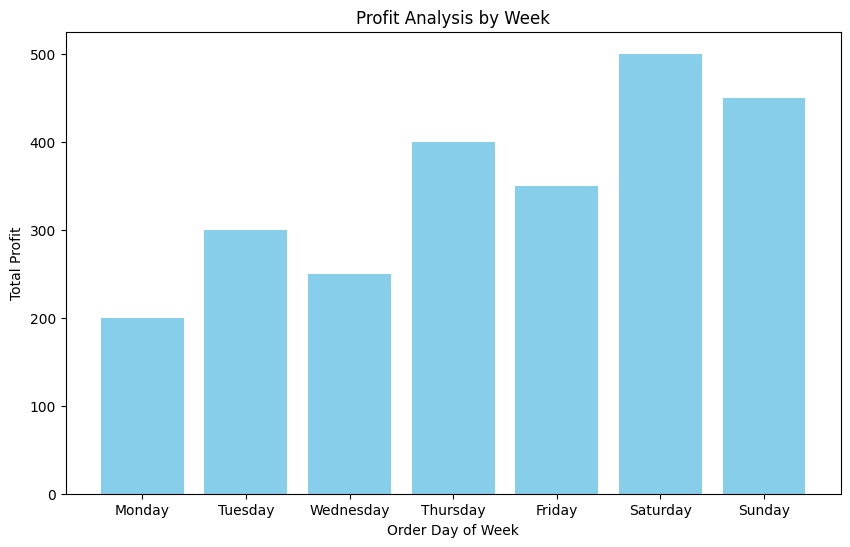

In [566]:
plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color='skyblue')
plt.xlabel('Order Day of Week')
plt.ylabel('Total Profit')
plt.title('Profit Analysis by Week')
plt.show()

# ANALYZE THE PROFIT BY CATEGORY AND SUB CATGORY

In [567]:
profit_by_category = df.groupby('Category')['Total Profit'].sum().reset_index()

In [568]:
profit_by_category

,Category,Total Profit
0,Baby Food,3886643.70
1,Beverages,888047.28
2,Cereal,2292443.43
3,Clothes,5233334.40
4,Cosmetics,14556048.66
5,Fruits,120495.18
6,Household,7412605.71
7,Meat,610610.00
8,Office Supplies,5929583.75
9,Personal Care,1220622.48


In [569]:
profit_by_category = {
    'Category': ['A', 'B', 'C', 'D'],
    'Total Profit': [40000, 30000, 20000, 10000]
}

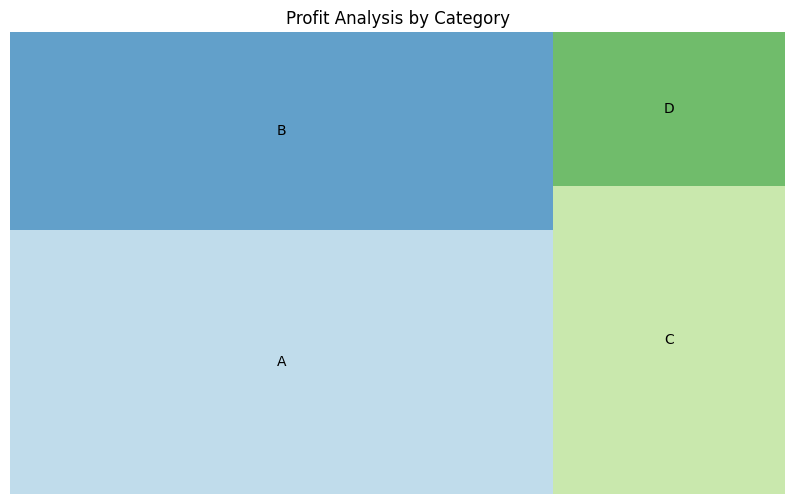

In [570]:
categories = profit_by_category['Category']
profits = profit_by_category['Total Profit']
colors = plt.cm.Paired(range(len(categories)))
plt.figure(figsize=(10, 6))
squarify.plot(sizes=profits, label=categories, color=colors, alpha=0.7)
plt.title('Profit Analysis by Category')
plt.axis('off')
plt.show()

In [571]:
profit_by_sub_category = df.groupby('Sub Category')['Total Profit'].sum().reset_index()

In [572]:
profit_by_sub_category

,Sub Category,Total Profit
0,C,6748328.46
1,H,16891599.58
2,L,10858727.86
3,M,9669542.50


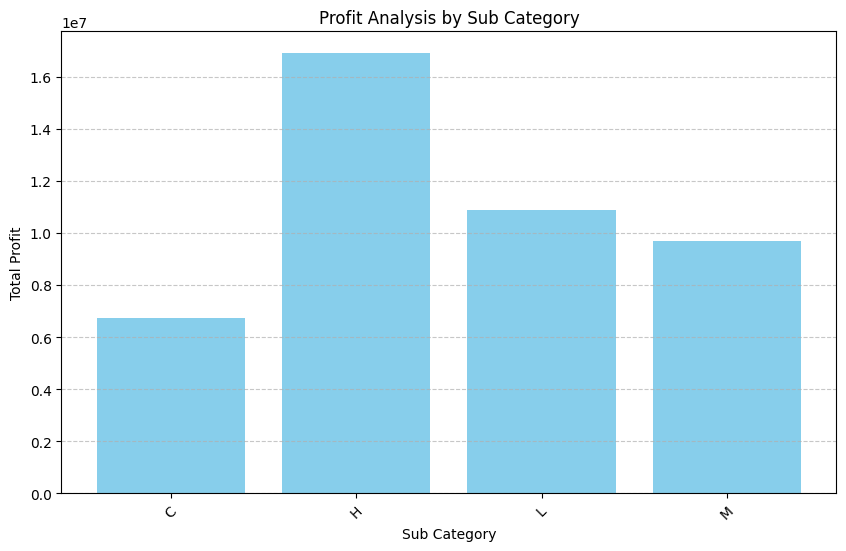

In [573]:
plt.figure(figsize=(10, 6))
plt.bar(profit_by_sub_category['Sub Category'], profit_by_sub_category['Total Profit'], color='skyblue')
plt.xlabel('Sub Category')
plt.ylabel('Total Profit')
plt.title('Profit Analysis by Sub Category')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# SALES AND PROFIT - SALES CHANNEL

In [574]:
sales_profit_by_sales_channel = df.groupby('Sales Channel').agg({'Sales':'sum', 'Total Profit':'sum'}).reset_index()

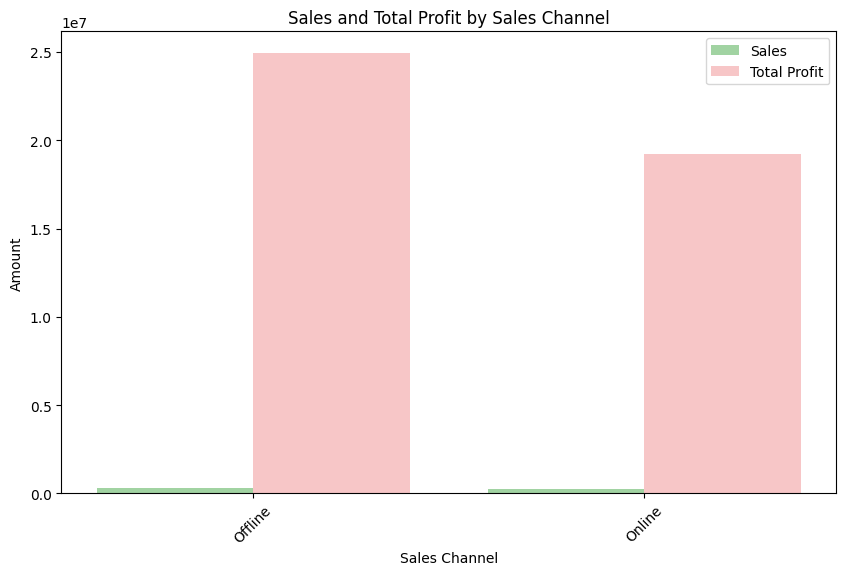

In [575]:
sales_channels = sales_profit_by_sales_channel['Sales Channel']
sales = sales_profit_by_sales_channel['Sales']
total_profit = sales_profit_by_sales_channel['Total Profit']
bar_width = 0.4
x = np.arange(len(sales_channels))

colors = ["#A1D3A2", "#F7C6C7"]  # Adjust as needed


fig, ax = plt.subplots(figsize=(10, 6))


ax.bar(x - bar_width / 2, sales, width=bar_width, label="Sales", color=colors[0])
ax.bar(x + bar_width / 2, total_profit, width=bar_width, label="Total Profit", color=colors[1])

ax.set_xlabel("Sales Channel")
ax.set_ylabel("Amount")
ax.set_title("Sales and Total Profit by Sales Channel")
ax.set_xticks(x)
ax.set_xticklabels(sales_channels, rotation=45)

ax.legend()

plt.show()

# SALES TO PROFIT RATIO

In [576]:
sales_profit_by_sales_channel = df.groupby('Sales Channel').agg({'Sales':'sum', 'Total Profit':'sum'}).reset_index()
sales_profit_by_sales_channel['sales to profit ratio'] = sales_profit_by_sales_channel['Sales'] / sales_profit_by_sales_channel['Total Profit']
print(sales_profit_by_sales_channel[['Sales Channel','sales to profit ratio']])

  Sales Channel  sales to profit ratio
0       Offline               0.011106
1        Online               0.012266


In [577]:
sales_channels = sales_profit_by_sales_channel['Sales Channel']
ratios = sales_profit_by_sales_channel['sales to profit ratio']

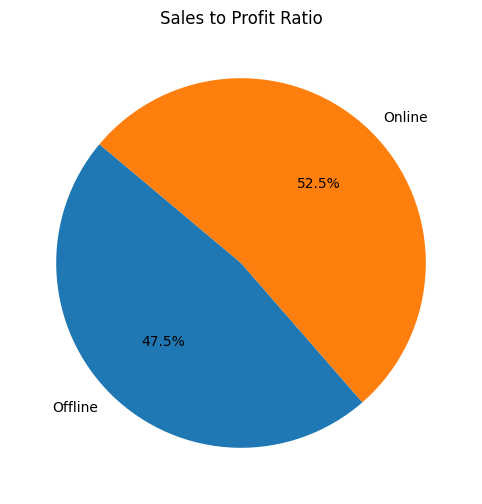

In [578]:
plt.figure(figsize=(8, 6))
plt.pie(ratios, labels=sales_channels, autopct='%1.1f%%', startangle=140)
plt.title('Sales to Profit Ratio')
plt.show()

# PREDICTIVE MODEL

# Define features (X) and target variable (y)

In [579]:
X = df[['Order Month', 'Order Year', 'Order Day of  Week', 'Sales']]  # Example features
y = df['Total Profit']

In [580]:
X,y

(    Order Month  Order Year  Order Day of  Week  Sales
 0             5        2010                   4   9925
 1             8        2012                   2   2804
 2             5        2014                   4   1779
 3             6        2014                   4   8102
 4             2        2013                   4   5062
 ..          ...         ...                 ...    ...
 95            7        2011                   1    888
 96           11        2011                   4   6267
 97            6        2016                   2   1485
 98            7        2015                   3   5767
 99            2        2012                   4   5367
 
 [100 rows x 4 columns],
 0     951410.50
 1     248406.36
 2     224598.75
 3      19525.82
 4     639077.50
         ...    
 95     65214.72
 96     15103.47
 97     93748.05
 98    144521.02
 99    889472.91
 Name: Total Profit, Length: 100, dtype: float64)

# Split data into training and testing sets

In [581]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [582]:
X_train, X_test, y_train, y_test

(    Order Month  Order Year  Order Day of  Week  Sales
 55            6        2012                   4   3482
 88            4        2012                   0    522
 26           10        2014                   0   5398
 42            6        2012                   3   2117
 69            4        2015                   5   7342
 ..          ...         ...                 ...    ...
 60            6        2013                   6    682
 71            8        2015                   4    673
 14            2        2014                   2   4901
 92            6        2012                   2   2021
 51            8        2013                   6   9606
 
 [80 rows x 4 columns],
     Order Month  Order Year  Order Day of  Week  Sales
 83            1        2011                   1   4085
 53           11        2011                   5   3457
 70            4        2013                   1   5010
 45            3        2016                   1    962
 44           11      

# Initialize and train a linear regression model

In [583]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make predictions on the test set

In [584]:
y_pred = model.predict(X_test)

In [585]:
y_pred

array([219790.57398202, 348321.56775036, 355642.39156049,  27621.03895706,
       594520.29894684, 259399.18609634, 199290.37433431, 446707.05323689,
       -11816.92192912, 795517.86235646, 358069.29455347, 707833.54583943,
       765458.54769379, 647674.4959216 , 143792.94311935, 372432.55971158,
       812907.46749353, 319873.93771919, 667212.26483423, 279875.85458181])

# Evaluate the model

In [586]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [587]:
mse,r2

(105126090906.38853, 0.37116933343687153)